IMPORING THE REQUIRED LIBRARIES

In [1]:
import os
import sys

import numpy as np
import pandas as pd

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler , OneHotEncoder


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

In [2]:
os.getcwd()

'c:\\Users\\Admin\\Desktop\\DS_Learning_KNYT\\02.Student_Performance_ML_E2E_project\\notebook'

READING THE DATA

In [3]:
data= pd.read_csv(r"C:\Users\Admin\Desktop\DS_Learning_KNYT\02.Student_Performance_ML_E2E_project\artifacts\train.csv")


In [4]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group D,master's degree,standard,none,62,70,75
1,female,group C,bachelor's degree,free/reduced,completed,66,83,83
2,female,group D,some college,free/reduced,none,79,89,86
3,male,group C,master's degree,free/reduced,none,61,67,66
4,male,group E,high school,standard,none,73,64,57


In [5]:
print("Number of Records in the dataset:",data.shape[0])
print("Number of Columns in the dataset:",data.shape[1])

Number of Records in the dataset: 800
Number of Columns in the dataset: 8


In [6]:
print("Columns are: \n",list(data.columns))

Columns are: 
 ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score']


BASIC PREPROCESSING

In [7]:
# Informations about the columns:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       800 non-null    object
 1   race_ethnicity               800 non-null    object
 2   parental_level_of_education  800 non-null    object
 3   lunch                        800 non-null    object
 4   test_preparation_course      800 non-null    object
 5   math_score                   800 non-null    int64 
 6   reading_score                800 non-null    int64 
 7   writing_score                800 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 50.1+ KB


In [8]:
# Based on this we can group the numerical features/columns and categorical features/columns:

num_features = data.select_dtypes(include=np.number).columns
cat_features = data.select_dtypes(include='object').columns

In [9]:
num_features = list(num_features)
cat_features = list(cat_features)

In [10]:
print("NUMERICAL FEATURES:",num_features)
print("CATEGORICAL FEATURES:",cat_features)

NUMERICAL FEATURES: ['math_score', 'reading_score', 'writing_score']
CATEGORICAL FEATURES: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [11]:
# Lets check for missing values in the data if any?

data.isnull().sum()               # Insight is : There is no missing value present in any of the column.

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [12]:
# Lets check for the duplicate records present if any ?

data.duplicated().sum()         # Insight is : There is no duplicate record present in the dataset.

0

In [13]:
# Lets Understand the Statistical Description of the data ?

data.describe().T              # Insight is : This is showing the some statistical values for numerical features.

,count,mean,std,min,25%,50%,75%,max
math_score,800.0,66.49625,15.024302,8.0,57.0,66.0,77.0,100.0
reading_score,800.0,69.55500,14.461532,24.0,60.0,70.0,80.0,100.0
writing_score,800.0,68.45625,15.085342,15.0,58.0,69.0,79.0,100.0


In [14]:
# Lets say if we want to see the statistical desription of the  categorical features aslo.

data.describe(include='object').T

,count,unique,top,freq
gender,800,2,female,421
race_ethnicity,800,5,group C,260
parental_level_of_education,800,6,some college,182
lunch,800,2,standard,523
test_preparation_course,800,2,none,521


In [15]:
# Filtering the average of math_score from dataset.
data.describe()['math_score']['mean']

66.49625

EXTRACTING  SOME STATISTICAL INSIGHTS

In [16]:
# Extracting Insights:

print("Ques 1 : What is the Maximum Marks Obtained by Student in each student ?\n")

for sub in num_features:
    print(f"Maximum Marks Obtained by students in {sub} is :",np.round(data.describe()[sub]['max'],2))

Ques 1 : What is the Maximum Marks Obtained by Student in each student ?

Maximum Marks Obtained by students in math_score is : 100.0
Maximum Marks Obtained by students in reading_score is : 100.0
Maximum Marks Obtained by students in writing_score is : 100.0


In [17]:
print("Ques 2 : What is the Minimum Marks Obtained by Student in each student ?\n")

for sub in num_features:
    print(f"Minimum Marks Obtained by students in {sub} is :",np.round(data.describe()[sub]['min'],2))

Ques 2 : What is the Minimum Marks Obtained by Student in each student ?

Minimum Marks Obtained by students in math_score is : 8.0
Minimum Marks Obtained by students in reading_score is : 24.0
Minimum Marks Obtained by students in writing_score is : 15.0


In [18]:
print("Ques 3 : What is the Average Marks of Student in each subject ?\n")

for sub in num_features:
    print(f"Average Marks of {sub} is :",np.round(data.describe()[sub]['mean'],2))

Ques 3 : What is the Average Marks of Student in each subject ?

Average Marks of math_score is : 66.5
Average Marks of reading_score is : 69.56
Average Marks of writing_score is : 68.46


In [19]:
print("Ques 4 : What does this standard deviation indicate about the spread or variability of marks among the students?\n")

print("The standard deviation measures the average deviation of marks/scores from the mean.\n")
for sub in num_features:
    sd=np.round(data.describe()[sub]['std'],2)
    print(f"Standard Deviation in Marks/score of {sub} is :",sd)
    print(f"Insight: Most scores of {sub} falling within approximately ± {sd}  from the mean\n")

Ques 4 : What does this standard deviation indicate about the spread or variability of marks among the students?

The standard deviation measures the average deviation of marks/scores from the mean.

Standard Deviation in Marks/score of math_score is : 15.02
Insight: Most scores of math_score falling within approximately ± 15.02  from the mean

Standard Deviation in Marks/score of reading_score is : 14.46
Insight: Most scores of reading_score falling within approximately ± 14.46  from the mean

Standard Deviation in Marks/score of writing_score is : 15.09
Insight: Most scores of writing_score falling within approximately ± 15.09  from the mean



The Distribution of Subject's Score Looks like:


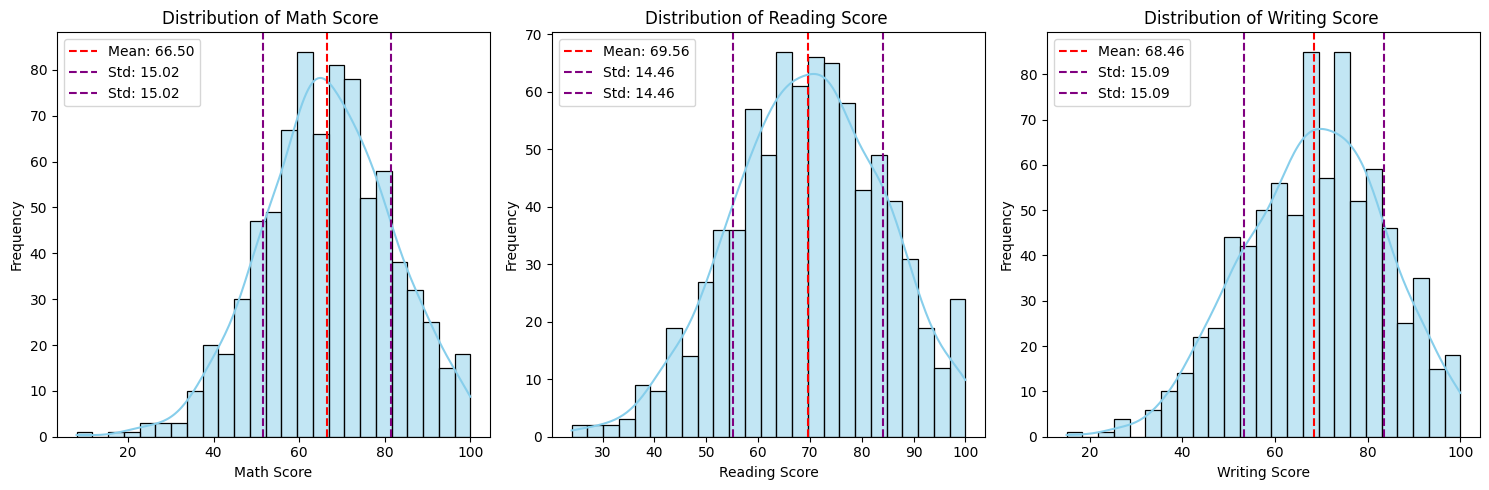

In [20]:
print("The Distribution of Subject's Score Looks like:")

scores = num_features

plt.figure(figsize=(15, 5))  # Adjust the figure size as needed

for i, score in enumerate(scores, start=1):
    # Plot distribution
    plt.subplot(1, len(scores), i)
    sns.histplot(data[score], kde=True, color='skyblue', bins=25)
    
    # Plot mean and standard deviation lines
    mean = data[score].mean()
    std = data[score].std()

    # Ploting mean , mean+std , mean-std
    plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axvline(mean + std, color='purple', linestyle='--', label=f'Std: {std:.2f}')
    plt.axvline(mean - std, color='purple', linestyle='--', label=f'Std: {std:.2f}')
    
    plt.title(f'Distribution of {score.replace("_", " ").title()} ')
    plt.xlabel(f'{score.replace("_", " ").title()}')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()



In [21]:
print("Ques 5: Comparing the standard deviation of all subjects, which subject shows the least variability in scores among the students?\n")

print("The subject with the least standard deviation has the least variability. Therefore, compare the standard deviations of the three subjects:")

min_std = float('inf')
subject_with_min_std = None

for sub in num_features:
    std_dev = np.round(data[sub].std(), 2)
    print(f"Standard deviation for {sub}: {std_dev}")
    if std_dev < min_std:
        min_std = std_dev 
        subject_with_min_std = sub

print(f"\nThe subject with the least variability in scores among the students is: {subject_with_min_std} with a standard deviation of {min_std}")

Ques 5: Comparing the standard deviation of all subjects, which subject shows the least variability in scores among the students?

The subject with the least standard deviation has the least variability. Therefore, compare the standard deviations of the three subjects:
Standard deviation for math_score: 15.02
Standard deviation for reading_score: 14.46
Standard deviation for writing_score: 15.09

The subject with the least variability in scores among the students is: reading_score with a standard deviation of 14.46


In [22]:
print(" Ques 6 : How the Distribution of the scores for math,writing and reading looks like ? Do we have Outliers?")

 Ques 6 : How the Distribution of the scores for math,writing and reading looks like ? Do we have Outliers?


In [23]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
math_score,800.0,66.49625,15.024302,8.0,57.0,66.0,77.0,100.0
reading_score,800.0,69.55500,14.461532,24.0,60.0,70.0,80.0,100.0
writing_score,800.0,68.45625,15.085342,15.0,58.0,69.0,79.0,100.0


In [24]:
percentile = data.describe().T.loc[:,['min','25%', '50%', '75%','max']]
percentile

,min,25%,50%,75%,max
math_score,8.0,57.0,66.0,77.0,100.0
reading_score,24.0,60.0,70.0,80.0,100.0
writing_score,15.0,58.0,69.0,79.0,100.0


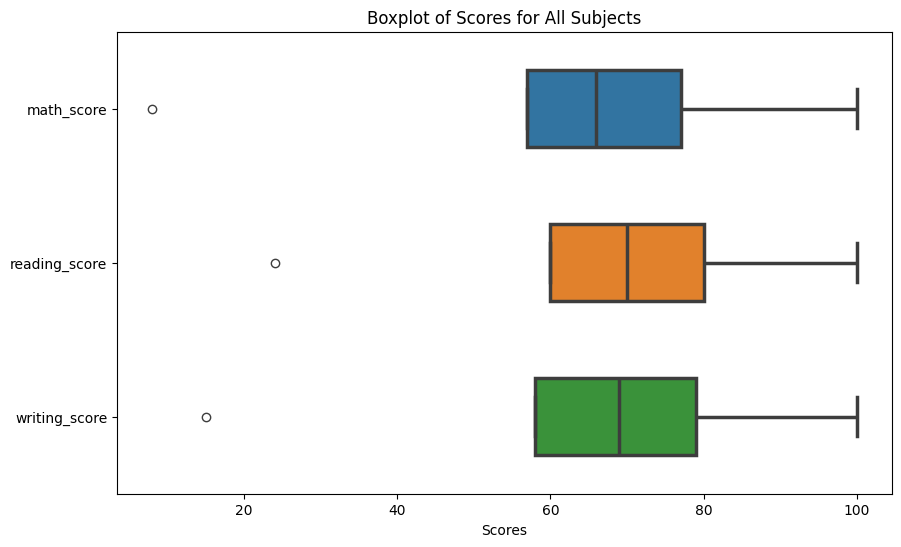

In [25]:
df = pd.DataFrame(percentile)

# Plot single boxplot for all subjects
plt.figure(figsize=(10,6))
sns.boxplot(data=df.T, orient='h', linewidth=2.5, width=0.5)
plt.xlabel('Scores')
plt.title('Boxplot of Scores for All Subjects')
plt.show()

In [26]:
# Outliers Detection:
# Using Five Number Summary we Detect the Outliers.


def find_outliers(data):
    outliers = {}
    for column in num_features:
        values = data[column]
        q1 = values.quantile(0.25)
        q3 = values.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers[column] = values[(values < lower_bound) | (values > upper_bound)].tolist()
    return outliers



In [27]:
data.head(2)   # Only Numerical Columns Obviously

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group D,master's degree,standard,none,62,70,75
1,female,group C,bachelor's degree,free/reduced,completed,66,83,83


In [28]:
# Call the function and print the outliers

print("Outliers are :")
outliers_dict = find_outliers(data)
for feature, outliers in outliers_dict.items():
    print(f"{feature}: {outliers}")


Outliers are :
math_score: [22, 24, 18, 23, 8, 26]
reading_score: [24, 29, 28, 24]
writing_score: [15, 23]


In [29]:
print("Ques 7 : If a student's math score is 77, which percentile does this score fall into according to the provided statistics?\n")

Ques 7 : If a student's math score is 77, which percentile does this score fall into according to the provided statistics?



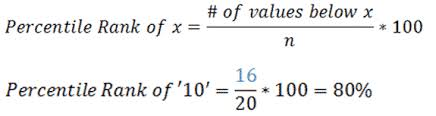

**Percentile:** To calculate the percentile, we need to find out how many students out of the total have scores less than or equal to 77. 
Then, divide this count by the total number of students and multiply by 100.

In [30]:
# Using filtering we get the values in True/False and then count it.
sub_marks = pd.Series(data['math_score'])
student_mark = 77

In [31]:
sub_marks < student_mark

0       True
1       True
2      False
3       True
4       True
       ...  
795    False
796     True
797     True
798     True
799    False
Name: math_score, Length: 800, dtype: bool

In [32]:
# Using filtering we get the values in True/False and then count it.

sub_marks = pd.Series(data['math_score'])
student_mark = 77

student_below = (sub_marks <= student_mark).sum()  # These are all True values count.

percentile_rank = student_below / len(sub_marks) * 100
print(f"Percentile Rank for  score of {student_mark } is  : ", np.round(percentile_rank,3),"%")


# Calculate percentage
percentage_score = (student_mark / 100) * 100
print("Percentage the person got:", percentage_score,'%')


Percentile Rank for  score of 77 is  :  76.75 %
Percentage the person got: 77.0 %


In [33]:
print("Ques 8 : If a student's reading score is 100 , which percentile does this score fall into according to the provided statistics?\n")

Ques 8 : If a student's reading score is 100 , which percentile does this score fall into according to the provided statistics?



In [34]:
# Using filtering we get the values in True/False and then count it.

sub_marks = pd.Series(data['reading_score'])
student_mark = 100

student_below = (sub_marks <= student_mark).sum()  # These are all True values count.

percentile_rank = student_below / len(sub_marks) * 100
print(f"Percentile Rank for  score of {student_mark } is  : ", np.round(percentile_rank,3),"%")


# Calculate percentage
percentage_score = (student_mark / 100) * 100
print("Percentage the person got:", percentage_score,'%')


Percentile Rank for  score of 100 is  :  100.0 %
Percentage the person got: 100.0 %


In [35]:
print(" Ques 9 : How many students scored full marks in all three subjects ? Lets make a new column names Total_score showing Total_Score_of_all_subjects")
data["Total_Score"] = data['math_score'] + data['reading_score'] + data['writing_score']
data.head()

 Ques 9 : How many students scored full marks in all three subjects ? Lets make a new column names Total_score showing Total_Score_of_all_subjects


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score
0,female,group D,master's degree,standard,none,62,70,75,207
1,female,group C,bachelor's degree,free/reduced,completed,66,83,83,232
2,female,group D,some college,free/reduced,none,79,89,86,254
3,male,group C,master's degree,free/reduced,none,61,67,66,194
4,male,group E,high school,standard,none,73,64,57,194


In [36]:
print("Number of students who scored full in all 3 subjects are:",len(data[data['Total_Score'] == 300]))
print("Those students are:")
data[data['Total_Score'] == 300]

Number of students who scored full in all 3 subjects are: 3
Those students are:


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score
57,male,group E,bachelor's degree,standard,completed,100,100,100,300
675,female,group E,associate's degree,standard,none,100,100,100,300
786,female,group E,bachelor's degree,standard,none,100,100,100,300


----------------

Feature Transformation

In [37]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score
0,female,group D,master's degree,standard,none,62,70,75,207
1,female,group C,bachelor's degree,free/reduced,completed,66,83,83,232
2,female,group D,some college,free/reduced,none,79,89,86,254
3,male,group C,master's degree,free/reduced,none,61,67,66,194
4,male,group E,high school,standard,none,73,64,57,194


In [38]:
num_features

['math_score', 'reading_score', 'writing_score']

In [39]:
cat_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [40]:
input_num_features = [column for column in num_features if column != 'math_score']
print("Input Numerical Features are : ",input_num_features)  # We gonna use these and transform these only for training input.

input_cat_features = cat_features
print("Input Categorical Features are : ",input_cat_features) 

Input Numerical Features are :  ['reading_score', 'writing_score']
Input Categorical Features are :  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [41]:
# Lets make pipeline to Impute the missing values if may occur in incoming data..also lets scale it so that further we can use sklearn on it.
# Making categorical data to numerical to work with sklearn.


# Numerical Pipeline : Making a pipeline to handle the numerical data.

num_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),  # Since we have some outliers to handle
    ('scaler',StandardScaler())
])

#Similarly

cat_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder())
]
                        )

In [42]:
# Now Since we have  pipelines to handle the numerical data and categorical...so here we need to combine both of them...using Column Transformation.
# We will apply this transformation on training 

preprocessor = ColumnTransformer(
    [
        ('Numerical_Pipeline',num_pipeline,input_num_features),
        ('Categorical_Pipeline',cat_pipeline,input_cat_features)
    ]
)

In [43]:
print("Numerical Features are:",input_num_features)
print("Categorical Features are:",input_cat_features)

Numerical Features are: ['reading_score', 'writing_score']
Categorical Features are: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [44]:
# Lets Do Segregation of Independent and Dependent Features:
X = data.drop(columns=["math_score"],axis=1)
y=data["math_score"]

In [45]:
# Lets Do train test split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [46]:
X_train.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score,Total_Score
264,male,group E,some high school,free/reduced,completed,67,59,199
615,male,group D,high school,standard,none,54,50,168
329,male,group C,associate's degree,free/reduced,completed,45,50,138
342,male,group D,bachelor's degree,free/reduced,none,66,67,196
394,male,group B,high school,standard,completed,49,46,147


In [47]:
X_test.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score,Total_Score
696,female,group E,associate's degree,standard,completed,75,77,217
667,female,group C,associate's degree,standard,none,66,67,192
63,female,group C,bachelor's degree,standard,none,75,81,219
533,female,group B,high school,standard,none,72,72,218
66,male,group E,some college,standard,none,60,54,183


In [48]:
y_train.head()

264    73
615    64
329    43
342    63
394    52
Name: math_score, dtype: int64

In [49]:
y_test.head()

696    65
667    59
63     63
533    74
66     69
Name: math_score, dtype: int64

In [50]:
print("Shape of X_train is:",X_train.shape)
print("Shape of y_train is:",y_train.shape)

print("Shape of X_test is:",X_test.shape)
print("Shape of y_test is:",y_test.shape)

Shape of X_train is: (640, 8)
Shape of y_train is: (640,)
Shape of X_test is: (160, 8)
Shape of y_test is: (160,)


In [51]:
X_train

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score,Total_Score
264,male,group E,some high school,free/reduced,completed,67,59,199
615,male,group D,high school,standard,none,54,50,168
329,male,group C,associate's degree,free/reduced,completed,45,50,138
342,male,group D,bachelor's degree,free/reduced,none,66,67,196
394,male,group B,high school,standard,completed,49,46,147
...,...,...,...,...,...,...,...,...
71,female,group D,some high school,standard,none,63,61,175
106,female,group C,bachelor's degree,standard,none,93,95,271
270,male,group D,associate's degree,standard,completed,84,85,256
435,female,group E,master's degree,free/reduced,none,56,54,155


In [52]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [53]:
X_train_transformed

array([[-0.16462772, -0.61728452,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-1.06812548, -1.21900373,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [-1.69362393, -1.21900373,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.01686935,  1.12101543,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       [-0.92912582, -0.95157297,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.09512789, -0.48356914,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

In [54]:
X_test_transformed

array([[ 0.3913709 ,  0.58615391,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [-0.23412754, -0.082423  ,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 0.3913709 ,  0.85358467,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-1.20712513, -0.95157297,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 1.43386832,  1.52216157,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.51212686, -0.01556531,  1.        , ...,  0.        ,
         0.        ,  1.        ]])